This is the Night Sky portion of the analysis

In [59]:
import cv2
import numpy as np

cap = cv2.VideoCapture('lanight.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
frameseq=[]
nframe=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:        
        if nframe%30==0:
            frameseq.append(frame)
        nframe = nframe + 1
    else: 
        break
cap.release()
cv2.destroyAllWindows()

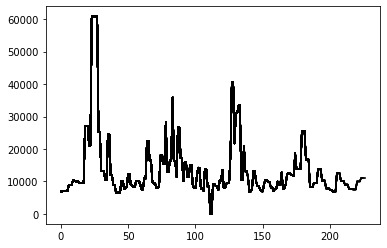

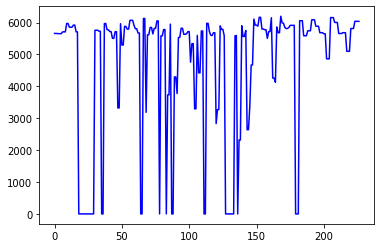

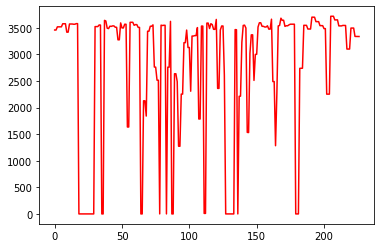

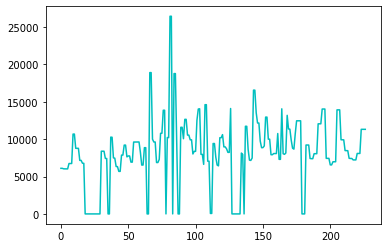

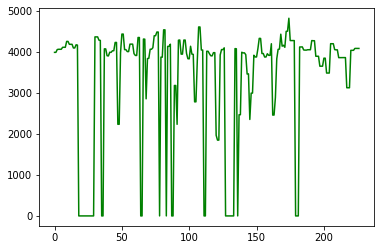

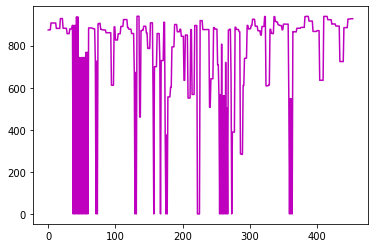

In [60]:
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.pyplot as plt
seqnp=np.array(frameseq)

#ROIs
LAX=[(107,609),(174,714)]
JW=[(704,1625),(750,1710)]
PORT =[(642,925),(780,1271)]
SM = [(5,480),(100,575)]
SPACEX = [(172,670),(185,745)] 
CLOUDS = [(108,85),(350,480)]

ts_lax = []
ts_jw = []
ts_port = []
ts_sm = []
ts_spacex = []
ts_clouds = []
for frid in range(0,seqnp.shape[0]):
    arr=seqnp[frid,CLOUDS[0][0]:CLOUDS[1][0],CLOUDS[0][1]:CLOUDS[1][1],0]
    w_clouds = arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    arr=seqnp[frid,LAX[0][0]:LAX[1][0],LAX[0][1]:LAX[1][1],0]
    w_lax =  arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    arr=seqnp[frid,JW[0][0]:JW[1][0],JW[0][1]:JW[1][1],0]
    w_jw =  arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    arr=seqnp[frid,PORT[0][0]:PORT[1][0],PORT[0][1]:PORT[1][1],0]
    w_port = arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    arr=seqnp[frid,SM[0][0]:SM[1][0],SM[0][1]:SM[1][1],0]
    w_sm = arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    ts_clouds.append(np.sum(w_clouds))
    arr=seqnp[frid,SPACEX[0][0]:SPACEX[1][0],SPACEX[0][1]:SPACEX[1][1],0]
    w_spacex = arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    ts_spacex.append(np.sum(w_spacex))
    if np.sum(w_clouds)>20000: #cloudy
        ts_lax.append(0)
        ts_jw.append(0)
        ts_port.append(0)
        ts_sm.append(0)
        ts_spacex.append(0)
    else:
        ts_lax.append(np.sum(w_lax))
        ts_jw.append(np.sum(w_jw))
        ts_port.append(np.sum(w_port))
        ts_sm.append(np.sum(w_sm))
        ts_spacex.append(np.sum(w_spacex))

        plt.plot(ts_clouds,'k')
plt.show()

plt.plot(ts_lax,'b')
plt.show()

plt.plot(ts_jw,'r')
plt.show()

plt.plot(ts_port,'c')
plt.show()

plt.plot(ts_sm,'g')
plt.show()

plt.plot(ts_spacex,'m')
plt.show()

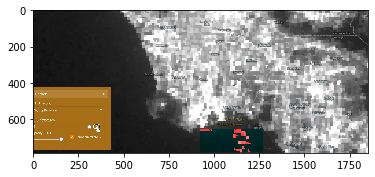

In [65]:
%matplotlib inline
#track boats
seqnpred=seqnp.copy()
for frid in range(0,seqnp.shape[0]):
    arr=seqnp[frid,PORT[0][0]+15:PORT[1][0],PORT[0][1]:PORT[1][1],0]
    w_port = arr/(np.ones((arr.shape[0],arr.shape[1]))*255)
    w_port[w_port>0.2] = 255
    #print((seqnp.shape[1],seqnp.shape[2]))
    seqnpred[frid,PORT[0][0]+15:PORT[1][0],PORT[0][1]:PORT[1][1],0] = w_port
    a=seqnpred[frid,:,:,:].copy()
    filtered_mask_2=Image.fromarray(a.astype(np.uint8))
    filtered_mask_2.save('boats.png')
    if frid%10==0:
        imshow(a)

['HDFEOS', 'HDFEOS INFORMATION']
['HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/BrightnessTemperature_M12', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/BrightnessTemperature_M13', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/BrightnessTemperature_M15', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/BrightnessTemperature_M16', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/DNB_At_Sensor_Radiance_500m', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Glint_Angle', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Granule', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Lunar_Azimuth', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Lunar_Zenith', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Moon_Illumination_Fraction', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/Moon_Phase_Angle', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/QF_Cloud_Mask', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/QF_DNB', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/QF_VIIRS_M10', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/QF_VIIRS_M11', 'HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields/QF_VIIRS_M12', 'HDFEOS/GRIDS/VNP_Grid_DNB/

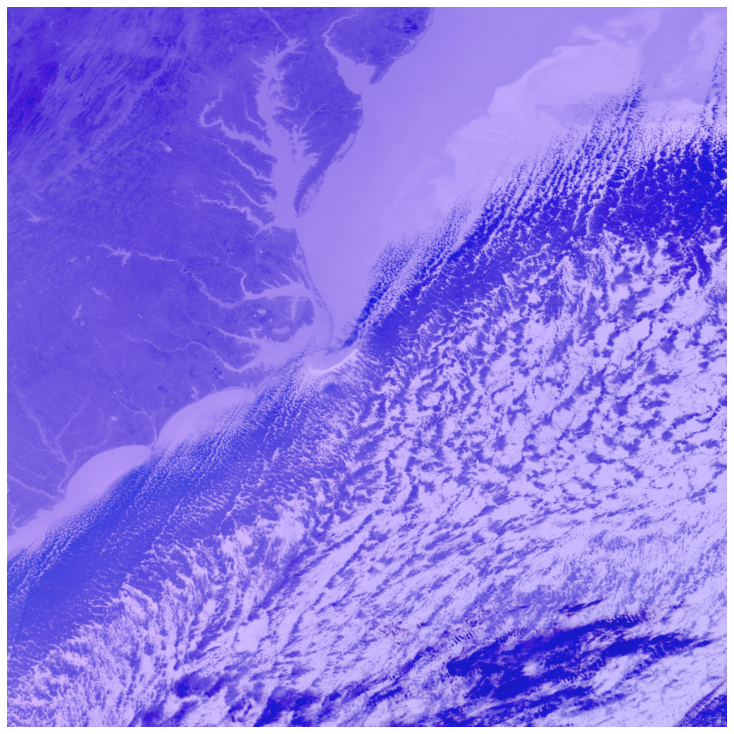

In [66]:
import cv2
import numpy as np
import h5py
from skimage import exposure
f = h5py.File('VNP46A1.A2020053.h10v05.001.2020054082628.h5', 'r')
print(list(f.keys()))
grids = list(f['HDFEOS']['GRIDS']) # List contents of GRIDS directory
h5_objs = []            # Create empty list
f.visit(h5_objs.append) # Walk through directory tree, retrieve objects and append to list
all_datasets = [obj for grid in grids for obj in h5_objs if isinstance(f[obj],h5py.Dataset) and grid in obj] 
print(all_datasets)
r = f[[a for a in all_datasets if 'M12' in a][0]] # M5 = Red
g = f[[a for a in all_datasets if 'M13' in a][0]] # M4 = Green
b = f[[a for a in all_datasets if 'M15' in a][0]] # M3 = Blue
n = f[[a for a in all_datasets if 'M16' in a][0]] # M7  = NIR
print(list(r.attrs))
scaleFactor = r.attrs['scale_factor'][0]    # Set scale factor to a variable
fillValue = r.attrs['_FillValue'][0] # Set fill value to a variable
red = r.value * scaleFactor
green = g.value * scaleFactor
blue = b.value * scaleFactor
nir = n.value * scaleFactor 
rgb = np.dstack((red,green,blue))            # Create RGB array
rgb[rgb == fillValue * scaleFactor] = 0      # Set fill value equal to 0
p2, p98 = np.percentile(rgb, (2, 98))                              # Calculate 2nd,98th percentile for updating min/max vals
rgbStretched = exposure.rescale_intensity(rgb, in_range=(p2, p98)) # Perform contrast stretch on RGB range
rgbStretched = exposure.adjust_gamma(rgbStretched, 0.5)            # Perform Gamma Correction
fig = plt.figure(figsize =(10,10))                           # Set the figure size
ax = plt.Axes(fig,[0,0,1,1]) 
ax.set_axis_off()                                            # Turn off axes
fig.add_axes(ax)
ax.imshow(rgbStretched, interpolation='bilinear', alpha=0.9) # Plot a natural color RGB
